# Predicting London Weather

![Londonbridge](Screenshot_2-4-2025_31023_www.mylondon.news.jpeg) 

### From the following dataset contains the following

- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

### Step 1 Importing the following packages

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

### Step 2 Check the dataset

In [476]:
london_weather = pd.read_csv(r'C:\Users\Michael Le\Desktop\london_weather_project\london_weather.csv')
#Displays all columns and rows
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

In [477]:
london_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Step 3 Data Cleaning

In [478]:
### Check the info

In [479]:
london_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [480]:
london_weather.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [481]:
### Convert date int to date data type, including months and years

In [482]:
london_weather["date"] = pd.to_datetime(london_weather["date"], format="%Y%m%d")
london_weather["year"] = london_weather["date"].dt.year
london_weather['month'] =london_weather['date'].dt.month

In [483]:
## Drop all duplicates and rows that contains null values

In [484]:
london_weather = london_weather.drop_duplicates()
london_weather = london_weather.dropna()

In [485]:
## Print the shape of the cleaned dataset

In [486]:
london_weather.shape

(13843, 12)

### Step 4 Exploratory data 

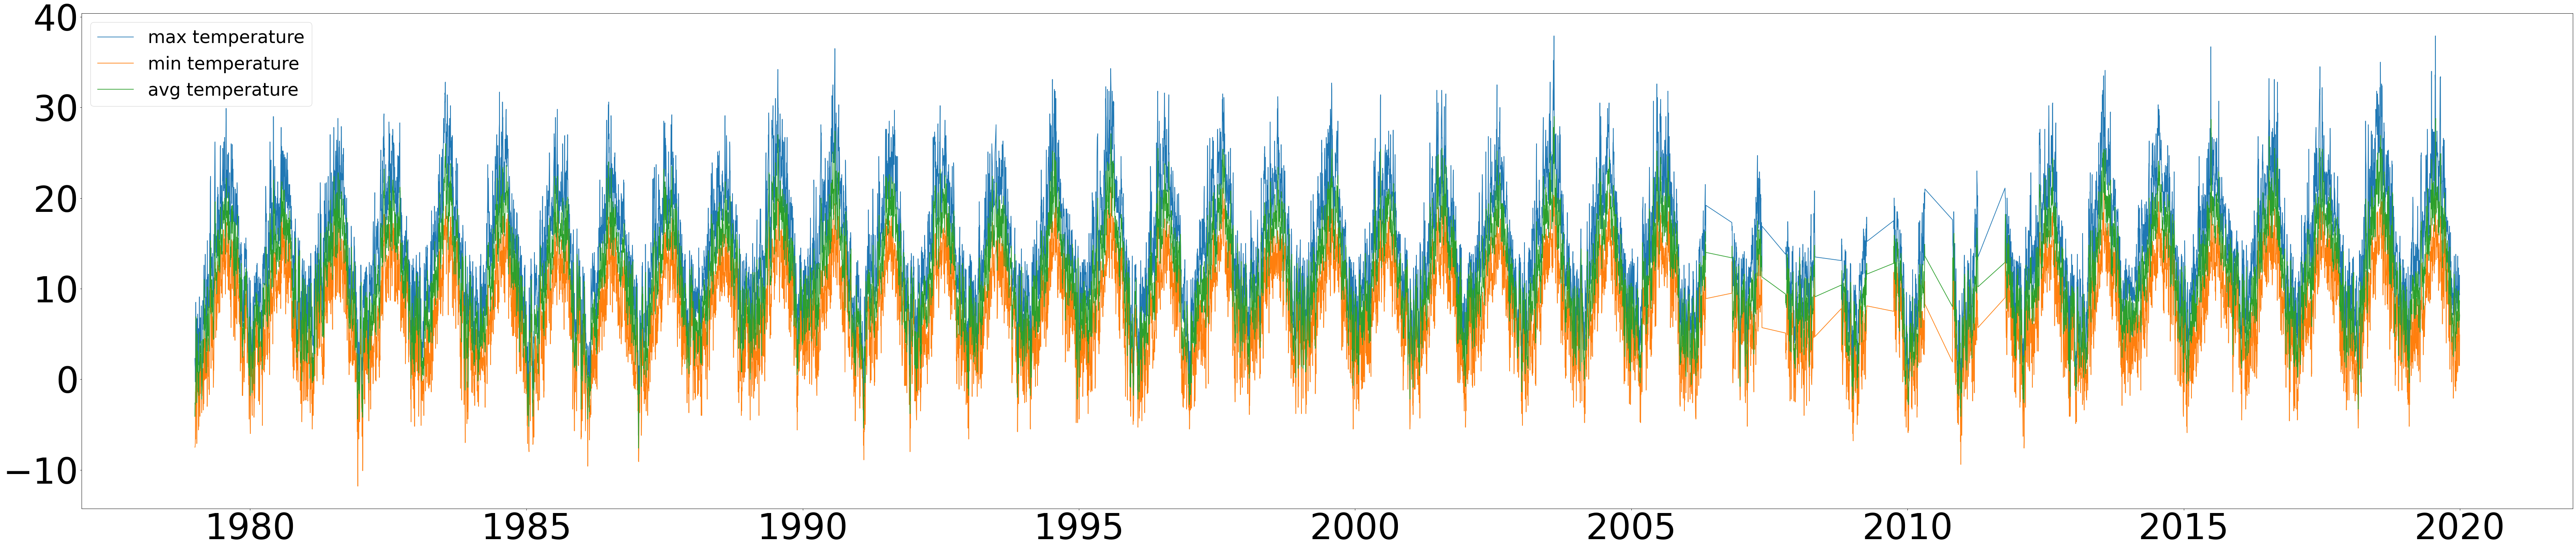

In [487]:
from matplotlib.pyplot import figure

figure(figsize=(100, 20), dpi=80)
x = london_weather["date"]
y = london_weather["max_temp"]
y1 = london_weather["min_temp"]
y2= london_weather["mean_temp"]

#plotting the maximum, minimum and average london temperatures across between 1980 to 2020.
plt.plot(x, y, label="max temperature")
plt.plot(x, y1, label="min temperature")
plt.plot(x, y2, label="avg temperature")

# Set x-axis and y-axis tick labels font size
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)

plt.rc('legend',fontsize=40)


plt.legend()
plt.show()

In [488]:
london_weather[['mean_temp','month','cloud_cover','sunshine','global_radiation','max_temp','min_temp','precipitation','pressure','snow_depth']].corr()

,mean_temp,month,cloud_cover,sunshine,global_radiation,max_temp,min_temp,precipitation,pressure,snow_depth
mean_temp,1.000000,0.228456,-0.084180,0.397064,0.635150,0.907365,0.955716,-0.007041,0.004609,-0.154469
month,0.228456,1.000000,-0.022247,-0.027880,-0.088886,0.185860,0.250563,0.035105,-0.037024,-0.057745
cloud_cover,-0.084180,-0.022247,1.000000,-0.734598,-0.466202,-0.184016,0.071692,0.229224,-0.237053,-0.001365
sunshine,0.397064,-0.027880,-0.734598,1.000000,0.851249,0.468120,0.222065,-0.226453,0.219350,-0.033778
global_radiation,0.635150,-0.088886,-0.466202,0.851249,1.000000,0.687035,0.479892,-0.157646,0.144784,-0.061488
max_temp,0.907365,0.185860,-0.184016,0.468120,0.687035,1.000000,0.806246,-0.067437,0.099683,-0.130107
min_temp,0.955716,0.250563,0.071692,0.222065,0.479892,0.806246,1.000000,0.037195,-0.070920,-0.157537
precipitation,-0.007041,0.035105,0.229224,-0.226453,-0.157646,-0.067437,0.037195,1.000000,-0.347647,-0.002357
pressure,0.004609,-0.037024,-0.237053,0.219350,0.144784,0.099683,-0.070920,-0.347647,1.000000,-0.020581
snow_depth,-0.154469,-0.057745,-0.001365,-0.033778,-0.061488,-0.130107,-0.157537,-0.002357,-0.020581,1.000000


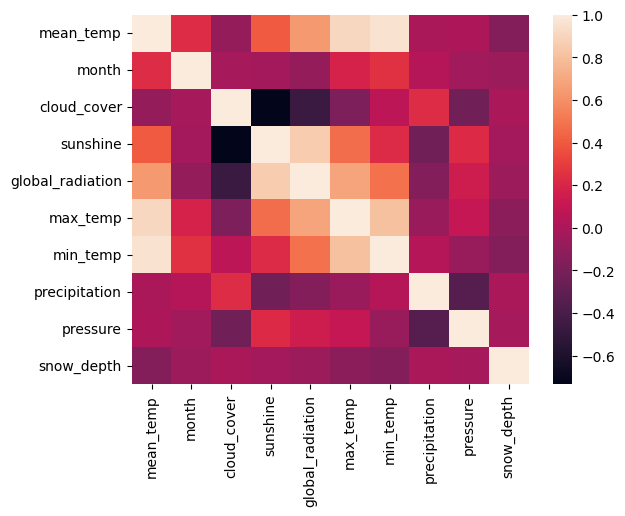

In [489]:
new_weather = london_weather[['mean_temp','month','cloud_cover','sunshine','global_radiation','max_temp','min_temp','precipitation','pressure','snow_depth']]
sns.heatmap(new_weather.corr(numeric_only=True))
plt.show() 

### Step 5 Feature Selection

In [490]:
# Choose features, define the target, and drop null values
feature_selection = ['month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', 'global_radiation']
target_var = 'mean_temp'
london_weather = london_weather.dropna(subset=['mean_temp'])

### Step 6 Machine Learning training and evaluation

In [491]:
# Extract the features achieved by applying the filter method
X = london_weather[feature_selection]
y = london_weather['mean_temp']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# Split from training data into training and validation sets (Using 20% from the training set for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [492]:
# Impute missing values
imputer = SimpleImputer(strategy="mean")
# Fit on the training data
X_train = imputer.fit_transform(X_train)
# Transform on the test data
X_test  = imputer.transform(X_test)
# Transform on the val data
X_val = imputer.transform(X_val)
    
# Scale the data
scaler = StandardScaler()
# Fit on the training data
X_train = scaler.fit_transform(X_train)
# Transform on the test data
X_test = scaler.transform(X_test)  
# Transform on the validation data
X_val = scaler.transform(X_val)  

In [493]:
# Predict, evaluate, and log the parameters and metrics of your models
## Regression Model
rg = LinearRegression()

## Fit the Regression Model
rg.fit(X_train,y_train)

## Predict test-set
y_pred_1 = rg.predict(X_test)

## Compute MSE 
mse_r = mean_squared_error(y_test,y_pred_1)

## Compute RMSE
rmse_r = mse_dt**(1/2)

## Print rmse for Regression
print(rmse_r)

3.467437013360038


In [494]:
# Predict, evaluate, and log the parameters and metrics of your models
## Decision Tree Regressor 
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf = 0.1,random_state=3)

## Fit the decision Tree
dt.fit(X_train,y_train)

## Predict test-set
y_pred_2 = dt.predict(X_test)

## Compute MSE 
mse_dt = mean_squared_error(y_test,y_pred_2)

## Compute RMSE
rmse_dt = mse_dt**(1/2)

## Print rmse Decision Tree 
print(rmse_dt)

3.467437013360038


In [495]:
## Random Forest
## SET THE SEED FOR PRODUCIBILITY 
SEED = 1

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,min_samples_leaf=0.12,random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train,y_train)

# Predict the test set labels 'y_pred'
y_pred_3 = rf. predict(X_test)

# Find the RMSE for the random forest 
rmse_rf = mean_squared_error(y_test,y_pred_3)**(1/2)

# print RMSE for random forest
print(rmse_rf)

3.862347612029745


In [496]:
#Gradient Boosting Regressor
xgb = GradientBoostingRegressor()

# Fit 'Gradient Boosting Regressor' to the training set
xgb.fit(X_train,y_train)

# Predict the test set labels 'y_pred'
y_pred_4= xgb.predict(X_test)

# Find the RMSE for Gradient Boosting Regressor 
rmse_xgb = mean_squared_error(y_test,y_pred_4)**(1/2)

# print RMSE for Gradient Boosting Regressor
print(rmse_xgb)

2.7835178177729407


In [497]:
#Support Vector Machine (Regression)
svr = SVR()

#Fit the Support Vector Machine to the training set
svr.fit(X_train,y_train)

# Predict the test set labels 'y_pred'
y_pred_5 = svr.predict(X_test)

# Find the RMSE for Support Vector Machine Regression
rmse_svr = mean_squared_error(y_test,y_pred_5)**(1/2)

# print RMSE for Support Vector Machine Regression
print(rmse_svr)

2.8397496428978495


In [498]:
#K-Nearest Neighbour 
knn = KNeighborsRegressor()

#Fit K-Nearest Neighbour to the training set
knn.fit(X_train,y_train)

# Predict the test set labels 'y_pred'
y_pred_6 = knn.predict(X_test)

# Find the RMSE for K-Nearest Neighbour Regression
rmse_knn = mean_squared_error(y_test,y_pred_6)**(1/2)

# print RMSE for K-Nearest Neighbour Regression
print(rmse_knn)


3.074761791920267


In [499]:
#XBG Regressor 
xgr = XGBRegressor()

#Fit XBG Boost to the training set
xgr.fit(X_train,y_train)

# Predict the test set labels 'y_pred'
y_pred_7 = xgr.predict(X_test)

# Find the RMSE for XBG Boost
rmse_xgr = mean_squared_error(y_test,y_pred_7)**(1/2)

# print RMSE for XBG Boost
print(rmse_xgr)


2.879698354742688


### Computing the R squared values on the testing data

In [500]:
score1 = metrics.r2_score(y_test,y_pred_1)
score2 = metrics.r2_score(y_test,y_pred_2)
score3 = metrics.r2_score(y_test,y_pred_3)
score4 = metrics.r2_score(y_test,y_pred_4)
score5 = metrics.r2_score(y_test,y_pred_5)
score6 = metrics.r2_score(y_test,y_pred_6)
score7 = metrics.r2_score(y_test,y_pred_7)

In [501]:
final_data = pd.DataFrame({'Models':['LR', 'DT' ,'RF','XGB','SVR','KNN','GBR'],"R2_SCORE":[score1,score2,score3,score4,score5,score6,score7]})
final_data

,Models,R2_SCORE
0,LR,0.587242
1,DT,0.625867
2,RF,0.535793
3,XGB,0.758900
4,SVR,0.749060
5,KNN,0.705807
6,GBR,0.741950


<Axes: xlabel='Models', ylabel='R2_SCORE'>

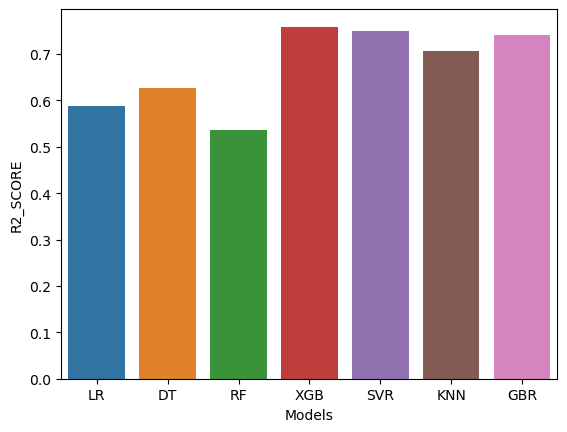

In [502]:
sns.barplot(final_data, x="Models", y="R2_SCORE")

### Similarly for the validation data

In [503]:
y_pred1 = rg.predict(X_val)
y_pred2 = dt.predict(X_val)
y_pred3 = rf.predict(X_val)
y_pred4 = xgb.predict(X_val)
y_pred5= svr.predict(X_val)
y_pred6= knn.predict(X_val)
y_pred7 = xgr.predict(X_val)

In [504]:
score1 = metrics.r2_score(y_val,y_pred1)
score2 = metrics.r2_score(y_val,y_pred2)
score3 = metrics.r2_score(y_val,y_pred3)
score4 = metrics.r2_score(y_val,y_pred4)
score5 = metrics.r2_score(y_val,y_pred5)
score6 = metrics.r2_score(y_val,y_pred6)
score7 = metrics.r2_score(y_val,y_pred7)

In [505]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','XGB','SVR','KNN','GBR'],"R2_SCORE":[score1,score2,score3,score4,score5,score6,score7]})
final_data

,Models,R2_SCORE
0,LR,0.595939
1,DT,0.610534
2,RF,0.533664
3,XGB,0.749550
4,SVR,0.737418
5,KNN,0.705219
6,GBR,0.733338


<Axes: xlabel='Models', ylabel='R2_SCORE'>

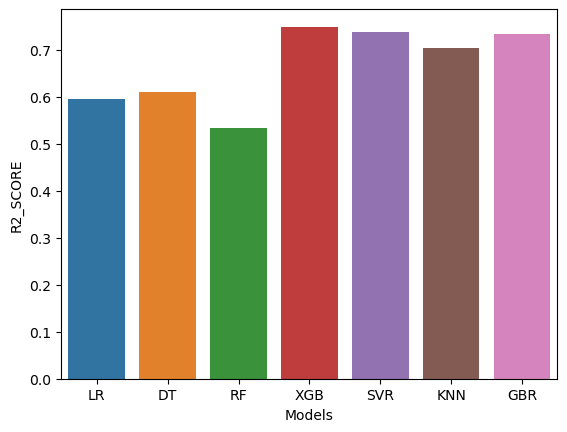

In [506]:
sns.barplot(final_data, x="Models", y="R2_SCORE")

###  Refer from this link https://encord.com/glossary/mean-square-error-mse/#:~:text=By%20squaring%20the%20differences%2C%20the,values%2C%20reflecting%20better%20overall%20performance.

### Compute their root Mean Square Errors for each model

### Regression

In [507]:
from sklearn.metrics import mean_squared_error as mse

In [508]:
print(mse(rg.predict(X_train),y_train,squared=False), mse(rg.predict(X_test),y_test,squared=False),mse(rg.predict(X_val),y_val,squared=False))

3.732029862151053 3.64202674534081 3.636498866997585


### Decision Tree

In [509]:
print(mse(dt.predict(X_train),y_train,squared=False), mse(dt.predict(X_test),y_test,squared=False),mse(dt.predict(X_val),y_val,squared=False))

3.4704663837580414 3.467437013360038 3.570215499108063


### Random Forest

In [510]:
print(mse(rf.predict(X_train),y_train,squared=False), mse(rf.predict(X_test),y_test,squared=False),mse(rf.predict(X_val),y_val,squared=False))

3.8793470915168946 3.862347612029745 3.9066922765049896


### X- Gradient Booster

In [511]:
print(mse(xgb.predict(X_train),y_train,squared=False), mse(xgb.predict(X_test),y_test,squared=False),mse(xgb.predict(X_val),y_val,squared=False))

2.7440888804753274 2.7835178177729407 2.8629947468636168


### Support Vector Machine Regressor

In [512]:
print(mse(svr.predict(X_train),y_train,squared=False), mse(svr.predict(X_test),y_test,squared=False),mse(svr.predict(X_val),y_val,squared=False))

2.861692337993849 2.8397496428978495 2.931515200223961


### K-Nearest Neighbour 

In [513]:
print(mse(knn.predict(X_train),y_train,squared=False), mse(knn.predict(X_test),y_test,squared=False),mse(knn.predict(X_val),y_val,squared=False))

2.52169233843901 3.074761791920267 3.1060599579422647


### XBG Regressor 

In [514]:
#XBG Regressor 
print(mse(xgr.predict(X_train),y_train,squared=False), mse(xgr.predict(X_test),y_test,squared=False),mse(xgr.predict(X_val),y_val,squared=False))

1.8262530576399212 2.879698354742688 2.9542054704428957
